In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data = df[['#Passengers']].values
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_scaled  = scaler.fit_transform(data)
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [11]:
X = []
y = []
look_back = 1
for i in range(len(data_scaled)-1):
    X.append(data_scaled[i:(i+look_back), 0])
    y.append(data_scaled[i+look_back, 0])
X, y = np.array(X), np.array(y)
print(X)
print(y)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [12]:
#Reshaping
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [13]:
train_size = int(len(X)*0.75)
test_size = len(X) - train_size
X_train = X[0:train_size, :]
X_test = X[train_size:len(X), :]
y_train = y[0:train_size]
y_test = y[train_size:len(y)]

In [17]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True ))
model.add(LSTM(units=50))
model.add(Dense(units=1))
          
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
4/4 [==============================] - 6s 10ms/step - loss: 0.0914
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0732
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0668
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0634
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0538
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0415
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0429
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0254
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0230
Epoch 13/100
4/4 [==============================] - 0s

In [22]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 2s 7ms/step - loss: 0.0098


0.009818628430366516

In [20]:
y_pred = model.predict(X_test)

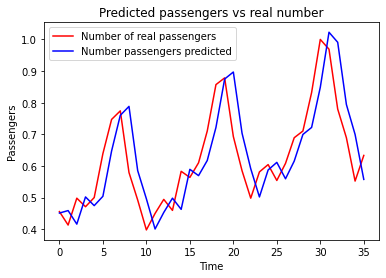

In [21]:
plt.plot(y_test, color='r', label='Number of real passengers')
plt.plot(y_pred, color='b', label='Number passengers predicted')
plt.title('Predicted passengers vs real number')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()